In [1]:
import numpy as np
import pandas as pd
# im
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

In [2]:
class Node:
    def __init__(self):
        
        self.feature_index=None
        self.threshold=None
        self.cond=None
        self.value=None
        self.children=[]
        self.left=None
        self.right=None
        self.isroot=False
        self.isleaf=False
        self.samples=None
        self.discrete=True
        # self.cond=None
        '''basically if self.discrete is true then match conditions by equality, else by high/low'''

def plot_node(root,dot,k,parent,thresholds=None):
    root_id=str(k)
    root_text='X'+str(root.feature_index)
    # if thresholds is not None:
        # thres=thresholds[root.feature_index][0]
        # thres=thresholds[root.feature_index][0]
        # if thres-int(thres)==0:
        #     thres=int(thres)
    root_text+=' < '+str(int(root.threshold))
    dot.node(root_id,root_text,shape='box')  
    k+=1

    # if (k!=0)

    l=len(root.children)
    for i in range(l):
        # dot.node(str(i),'feature')
        child=root.children[i]
        
        
        if child.isleaf:
            text='Class '+str(child.value).strip('[]')
            dot.node(str(k),text,shape='oval')
            node_label=child.cond
            node_label = bool(node_label)
                # print(node_label)
            dot.edge(root_id,str(k),str(node_label))
            k+=1
        else:
            dot,k=plot_node(child,dot,k,root_id)
    if parent is not None:
        node_label=root.cond
        
        node_label = bool(node_label)
        # print(node_label)
        
        dot.edge(parent,root_id,str(node_label))

    return dot,k


def plot_tree(root,k=0,*,render_flag=False,thresholds=None):
    dot=graphviz.Digraph()
    dot,k=plot_node(root,dot,k,None,thresholds)
    if render_flag==True:
        dot.render('Tree',format='png',cleanup=True,view=True)
    return dot

# dot=plot_tree(head)
# dot

In [124]:
n=20
X=np.random.randint(0,3,size=(n,3))
y=np.random.randint(0,2,size=(n,1))
# tree=ID3(X,y,verbose=False)
# plot_tree(tree)

In [4]:
def entropy_binary(p,n):
    '''higher entropy means more equal dataset, is from 0 to 1'''
    N=p+n
    p/=N
    n/=N

    return -(p*np.log2(p)+n*np.log2(n))

def entropy_prob(p_array):
    '''higher entropy means more equal dataset, is from 0 to 1'''

    p_=p_array.astype('float64')

    N=np.sum(p_)
    p_/=N
    
    return -np.sum(p_*np.log2(p_))

def entropy(a):
    x,probs=np.unique(a,return_counts=True)
    return entropy_prob(probs)

k=np.array((9,5,2))
entropy(k)


1.584962500721156

In [5]:
x=np.arange(3)

In [6]:
a = np.random.randint(0,5,size=(4,3))
a[:,0:1].shape

def mode(x):
    val,counts=np.unique(x,return_counts=True)
    return val[np.argmax(counts)]


In [7]:
def gain(S,y,*,feature_index):
    '''calculates information gain'''
    A=feature_index
    old_entropy=entropy(y)
    n,m=S.shape
    S_A=S[:,A]
    vals=np.unique(S_A)
    new_entropy=0
    for v in vals:
        yv=y[S_A==v]
        new_entropy+=yv.shape[0]/n*entropy(yv)
    
    return old_entropy-new_entropy

def optimum_feature(X,y,*,features = None, ):
    n,m=X.shape
    
    if features is None:
        features=np.ones(m)
    
    # m=features.shape[0]
    max_feature=None
    max_gain=-1
    # print("Gains follow : ")
    for i in range(m):
        if features[i]==0:
            continue
        gain1=gain(X,y,feature_index=i)
        # print(i, gain1.item())
        if i==0 or max_gain<gain1:
            max_feature=i

    return max_feature

In [8]:
optimum_feature(X,y,features=None)

2

In [9]:
# vals,counts=np.unique(y,return_counts=1)
# if counts.shape[0]==1:
# #     print(counts[0])
# print(counts.shape[0])

y=np.random.randint(0,3,size=(4,1))
# np.concatenate((y,(np.array((44,))[:,np.newaxis])),axis=0)
# np.array((2,))[:,np.newaxis].shape

def get_2d_vector(x):
    return np.array((44,))[:,np.newaxis]

def push_back(x,v):
    return np.concatenate((v,get_2d_vector(x)),axis=0)
    # return v

def push_front(x,v):
    
    if len(v.shape)==1:
        x=np.array((x,))
    elif len(v.shape)==2:
        x=get_2d_vector(x)
    return np.concatenate((x,v),axis=0)
    # return v

k=push_front(y[0],y)
k.T, y.T


(array([[44,  1,  0,  1,  1]]), array([[1, 0, 1, 1]]))

In [10]:
len(np.array((32,)).shape)
len(get_2d_vector(3).shape)

2

In [11]:

# def f(x,r):
#     # return x*x+r
#     return x[0]
# f(y,3)

# gain(y,y,feature_index=0)
# np.where(y<2,)

np.ones((3,1))

array([[1.],
       [1.],
       [1.]])

In [12]:
np.random.seed=0
def load_data(test_ratio=0.2,features=4):
    
    from sklearn.datasets import load_iris
    iris=load_iris()
    X=iris.data[:,:]
    n=X.shape[0]
    y=iris.target.reshape(n,1)
    test_size=int(test_ratio*(X.shape[0]))
    X_comb=np.concatenate((X,y),axis=1)
    n=X_comb.shape[0]
    # X_comb.sort(axis=0)
    np.random.shuffle(X_comb)
    cutset=np.random.choice(n,test_size,replace=False)
    mask=np.ones(n,dtype=bool)
    mask[cutset]=False
    X_test_comb=X_comb[~mask]
    X_new_comb=X_comb[mask]
    X_new_comb.sort(axis=0)
    X_test_comb.sort(axis=0)
    X=X_new_comb[:,:features]
    y=X_new_comb[:,-1:]

    X_test=X_test_comb[:,:features]
    y_test=X_test_comb[:,-1:]
    return X,y,X_test,y_test


In [13]:
X,y,X_test,y_test=load_data()

In [14]:
y.shape

(120, 1)

In [110]:
def get_max_gain(X,y,inplace=False):
    n,m=X.shape
    X_=X.copy(

    )
    y_=y.copy()
    best_threshold=None
    best_feature=-1
    best_gain=None
    for i in range(m):
        vals,counts=np.unique(X_[:,i],return_counts=True)
       
        ind=np.argsort(X_[:,i]).reshape(y_.shape)
        # print(" yo ind shape ",ind.shape)  
        # print("shape of y is ",y_.shape)  
        y_=np.take_along_axis(y_,ind,axis=0)      
        # print(ind[:, np.newaxis].shape)
        X_ = np.take_along_axis(X_, ind.reshape(n,1), axis=0)        
        y2=push_front(y_[0],y_)
        y3=y_.copy()
        y3-=y2[:-1]
        mask=np.where(y3!=0,True,False)        
        r=X_[:,i:i+1]
        r1=push_front(r[0],r)
        r2=np.where(mask,(r+r1[:-1])/2,-1)
        if 0:
            print("r2 : ",r2.shape)
        thresholds=np.where(r2!=-1)[0]
        # print("thredhls shape ",thresholds.shape)
        r3=[(gain(np.where(r<c,0,1),y_,feature_index=0)) for c in thresholds]
        gain1=max(r3)
        if 0:
            print(thresholds.shape)
            print(len(thresholds))
            print((thresholds))
            best_index=thresholds.index(best_gain)

        # best_index=np.argmax(r3)
        # best_threshold=thresholds[best_index]
        
        # print("thredhls shape ",thresholds.shape)
        # if verbose:
        #     print("gain and threshold is ", best_gain, best_threshold)
        #     print(" min  y  ",min(y_),np.unique(y_)

        if best_gain is None or gain1>best_gain:
            best_index=np.argmax(r3)
            best_threshold=thresholds[best_index]
            best_feature=-1
            best_gain=gain1
            
        # r=np.where(r<best_threshold,0,1)

        # X_[:,i:i+1]=r        
        # best_thresholds[i]=best_threshold

    if inplace:
        X=X_
        y=y_
    
    return best_feature,best_threshold

# X=iris.data[:,:]
# y=iris.target
# X,y,X_test,y_test=load_data()
# X,y,thresholds=discretize(X,y,5)
    

In [16]:
y.shape

(120, 1)

In [84]:
mask=np.where(y>1)
mask
x1[mask,:]
# # X1[81:84,:]
# x1[81:84,:]



array([[[ 0.94345582,  1.09151281,  0.46091034],
        [ 0.62578785,  1.25055045, -1.53212852],
        [ 0.62035788,  0.94119757,  1.20997477],
        [-0.44950508, -0.8791815 , -0.95383943],
        [ 0.09457064,  0.97265687, -0.87809315],
        [ 0.43490535,  0.77206628, -0.9737695 ],
        [ 0.01768155,  0.7334041 ,  1.41471194],
        [-1.38626037,  0.26755031,  1.11164443],
        [-1.06489955, -0.39456561,  1.19396498],
        [ 0.34735335, -1.32083466,  1.48365509],
        [-0.14622547, -0.30469576, -0.55759739],
        [-0.59114865,  1.07567469,  0.68134088],
        [-0.36549543, -0.64541104,  2.01946863],
        [-0.43182737, -0.56684646, -0.33391522],
        [-0.18809311, -0.52850673, -0.63834166],
        [-2.68672571,  0.90017374, -0.40973014],
        [ 1.27270298,  0.56527525, -1.4565771 ],
        [ 1.07977955,  0.74064674,  1.16934395],
        [ 0.78392881, -1.72331717, -0.38341286],
        [-0.82333748, -0.93893678,  1.88536505],
        [-0.94560394

X

In [138]:

k=1
X1=[]
y1=[]
f1=[]
f0=2

maxh =7
h=1
verbose=False
def ID3(X,y):
    global h
    h+=1
    
    '''features = -1 to include all features, else pass features array'''
    
        
    n,m=X.shape
    # if features is None:
    #     features=np.ones((m,1))
    
    root=Node()
    root.samples=n
    root.isroot=True
    root.isleaf=True

    vals,counts=np.unique(y,return_counts=1)
    if counts.shape[0]==1:
        root.value=y[0]
        if verbose:
            print("single target class left",root.value)
        
        return root
    if h>maxh:
        root.value=mode(y)
        if verbose:
            print("single target class left",root.value)
        
        return root
    
    
    root.isleaf=False
    root.feature_index,root.threshold=get_max_gain(X,y)
    # feature_index=optimum_feature(X,y,features=features)
    # root.feature_index=feature_index
    
    # r=np.where(r<best_threshold,0,1)
    mask=np.where(X[:,root.feature_index]<root.threshold)
    print("hi")
    if (y[mask].shape[0]>0):
        
        print("shape of y is ",y[mask].shape[0])  
        root.left=ID3(X[mask],y[mask])
        (root.left).true_cond=True
    if (y[mask].shape[0]>0):
        print("shape of y is ",y[mask].shape[0])  
        root.right=ID3(X[mask],y[mask])
        (root.right).true_cond=False

    return root
        
        # new_entropy+=yv.shape[0]/n*entropy(yv)
    


        
        
    

In [142]:
def train(X,y,model='ID3'):
    
    if model=='ID3':

        tree= ID3(X,y)
        return tree, plot_tree(tree)
         

In [19]:
X[2,:]

array([1., 1., 1., 1.])

In [20]:
def pred_node(root,x)
    if root.isleaf:
        # print("yo im at ",root.value)
        return root.value
    
    val=x[root.feature_index]-root.threshold
    k=-12
    # for child in root.children:
        if (root.left).cond==(val<0):
            return pred_node(root.left,x)
        else:
            return pred_node(root.right,x)
        
    
    
def pred(X,tree,*,discrete,thresholds):
    n,m=X.shape
    # tree, plot2=train(X,y,verbose=False,discrete=True,maxbins=5,plotting=True,render_flag=False)

    pred_=np.ones((n,1))
    for i in range(n):
        x=X[i,:]
        pred_[i]=pred_node(tree,x,discrete=discrete,thresholds=thresholds)
    return pred_
    

def test(X,y,tree):
    pred_=pred(X,tree)
    # return np.count_nonzero(pred_!=y)/y.shape[0]
    n=pred_.shape[0]
    # print
    # a1=[0,0,0]
    correct=0
    for i in range(n):
        # pass
        if (y[i]==pred_[i]):
            correct+=1
    return correct/n
    # for

# pred1=(pred(X,tree,discrete=discrete_flag,thresholds=thresholds))
# print(test(X,y,tree,discrete=discrete_flag,thresholds=threholds))

In [145]:

# X=iris.data[:,:]
# y=iris.target
# X,y,X_test,y_test=load_data()
# without discretizing
discrete_flag=True
tree , plot2=train(X,y)
# print("training accuracy",test(X,y,tree,discrete=discrete_flag,thresholds=thresholds))
# plot2


# print("testing accuracy",test(X_test,y_test,tree,discrete=discrete_flag,thresholds=thresholds))
# pred1=(pred(X_test,tree,discrete=discrete_flag,thresholds=thresholds))
# plot2

In [22]:
X

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],


 yo ind shape  (120,)
(120,)
 yo ind shape  (120,)
(120,)
 yo ind shape  (120,)
(120,)
 yo ind shape  (120,)
(120,)
testing accuracy 0.26666666666666666


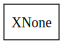

In [148]:
# with discretizing
# X=iris.data[:,:]
# y=iris.target
X,y,X_test,y_test=load_data()
MAXBINS=3
y=y.flatten()
y_test=y_test.flatten()
# y=y.reshape((n,0))
X,y,threholds=discretize(X,y,MAXBINS)
discrete_flag=False
tree , plot1=train(X,y)
print("testing accuracy", test(X_test,y_test,tree,discrete=discrete_flag,thresholds=threholds))
pred1=(pred(X_test,tree,discrete=discrete_flag,thresholds=thresholds))
plot1


In [25]:

n1=y_test.shape[0]
print(n1)
correct=0
for i in range(n1):
    
    if (y_test[i]==pred1[i]):
        correct+=1
    else:
        print(y_test[i],pred1[i])

        
    # return correct/n

30
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
2.0 [0.]
2.0 [0.]
2.0 [0.]
2.0 [0.]
2.0 [0.]
2.0 [0.]
2.0 [0.]
2.0 [0.]
2.0 [0.]
2.0 [0.]
2.0 [0.]


In [26]:
pred1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [27]:
X_test.shape,y_test.shape

((30, 4), (30,))

In [28]:
y.flatten().shape
y.shape

(120,)

In [29]:
X.shape,y.shape

((120, 4), (120,))

In [30]:
np.unique(y)

array([0., 1., 2.])

In [31]:
correct=np.count_nonzero(X[:,3]==y)
total=y.shape[0]
# accuracy=np.count_nonzero(X[:,3]==y)/y.shape[0]
accuracy=correct/total
print(correct,"/",total, " correct")
print( "accuracy = ",round(accuracy*100,2), "%")

81 / 120  correct
accuracy =  67.5 %


In [32]:
S=np.array((9,5))
# S=np.array((9,5))


In [33]:
# example

# Create a Digraph object
dot = graphviz.Digraph()

# # Add nodes
dot.node('A', 'Feature 1 <= 5')
dot.node('B', 'Class 0')
dot.node('C', 'Feature 1 > 5')
dot.node('D', 'Feature 2 <= 3')
dot.node('E', 'Class 1')
dot.node('F', 'Class 2')

# # Add edges
dot.edge('A', 'B', label='True')
dot.edge('A', 'C', label='False')
dot.edge('C', 'D', label='True')
dot.edge('C', 'F', label='False')
dot.edge('D', 'E', label='True')
dot.edge('D', 'F', label='False')

# Render the graph
# dot.render('sample_tree', format='png', cleanup=True,view=True)
# graph.render(directory='doctest-output', view=True) #for saving